In [2]:
# Test imports
import sys
sys.path.append('/home/andrei/Desktop/PhD/Carepath')

from clean_ndes import *
from clean_ndes import *

print("✓ Package imported successfully!")
print(f"Config: N={N_TRAJECTORIES}, T={T_TIME_STEPS}, D={D_DIMENSIONS}")

✓ Package imported successfully!
Config: N=1000, T=183, D=7


In [3]:
import numpy as np

# Generate synthetic data
np.random.seed(SEED)
data, adherence_dropped_at = generate_synthetic_data_super_simple_Interactions2StepsApart(
    N_TRAJECTORIES, T_TIME_STEPS, D_DIMENSIONS
)

print(f"✓ Data generated: shape={data.shape}")
print(f"  Adherence drops: {len(adherence_dropped_at)}")

✓ Data generated: shape=(1000, 183, 7)
  Adherence drops: 90538


In [4]:
# Create model
model = AdherencePredictor(in_dim=INPUT_DIM, out_dim=OUTPUT_DIM)

# Test forward pass
import torch
dummy_input = torch.randn(7)
logits = model(dummy_input)
print(f"✓ Model forward: input shape={dummy_input.shape}, output shape={logits.shape}")

# Test inference
prediction = model.inference(dummy_input)
print(f"✓ Model inference: predicted class={prediction.item()}")

✓ Model forward: input shape=torch.Size([7]), output shape=torch.Size([2])
✓ Model inference: predicted class=0


In [5]:
from torch.utils.data import DataLoader

# Test intra-trajectory dataset
dataset_intra = SampledLength2AdherenceDataset(data)
X, Y = dataset_intra[0]
print(f"✓ Intra dataset: sample shapes X={X.shape}, Y={Y.shape}")

# Test inter-trajectory dataset  
dataset_inter = AdherenceDataset(data)
X, Y = dataset_inter[0]
print(f"✓ Inter dataset: sample shapes X={X.shape}, Y={Y.shape}")

✓ Intra dataset: sample shapes X=torch.Size([2, 6]), Y=torch.Size([2])
✓ Inter dataset: sample shapes X=torch.Size([183, 6]), Y=torch.Size([183])


In [6]:
# Create dummy data
batch_size, T, n_classes = 5, 10, 2
outputs = torch.randn(batch_size, T, n_classes)
labels = torch.randint(0, n_classes, (batch_size, T))

# Test losses
train_loss = get_batch_loss(outputs, labels)
val_loss = get_batch_loss_validation(outputs, labels)

print(f"✓ Train loss: {train_loss.item():.4f}")
print(f"✓ Val loss: {val_loss.item():.4f}")

✓ Train loss: 1.0117
✓ Val loss: 0.4889


### current NDEs cannot learn more than 2 timesteps in the past :(

In [ ]:
from typing import Any


from torch.utils.data import random_split

# Setup small dataset
N_test, T_test = 100, 10

# TODO: pick dataset
# adherence trigger 1 timesteps in the past
# data_test, _ = generate_synthetic_data_super_simple(N_test, T_test, D_DIMENSIONS)
# adherence trigger 2 timesteps in the past
data_test, _ = generate_synthetic_data_super_simple_Interactions2StepsApart(N_test, T_test, D_DIMENSIONS)
dataset_test = AdherenceDataset(data_test)



train_size = int(0.8 * len(dataset_test))
val_size = len(dataset_test) - train_size
train_set, val_set = random_split(dataset_test, [train_size, val_size])

train_loader = DataLoader[Any](train_set, batch_size=10, shuffle=True)
val_loader = DataLoader[Any](val_set, batch_size=10, shuffle=False)

# Train model
model = AdherencePredictor(in_dim=INPUT_DIM, out_dim=OUTPUT_DIM)
EPOCHS = 100
train_losses_acrossEpochs = []
val_losses_acrossEpochs = []

for epoch in range(EPOCHS):
    train_losses, val_losses = train_one_epoch(
        model, train_loader, val_loader, learning_rate=0.001, verbose=False
    )
    train_losses_acrossEpochs.extend(train_losses)
    val_losses_acrossEpochs.extend(val_losses)

print(f"✓ Training complete: {len(train_losses)} batches")
print(f"  Final train loss: {train_losses[-1]:.4f}")
print(f"  Final val loss: {val_losses[-1]:.4f}")

✓ Training complete: 8 batches
  Final train loss: 0.6097
  Final val loss: 0.5111


In [13]:
print("shpae a sample from val set", np.shape(val_set.dataset[0][0]))



shpae a sample from val set torch.Size([10, 6])


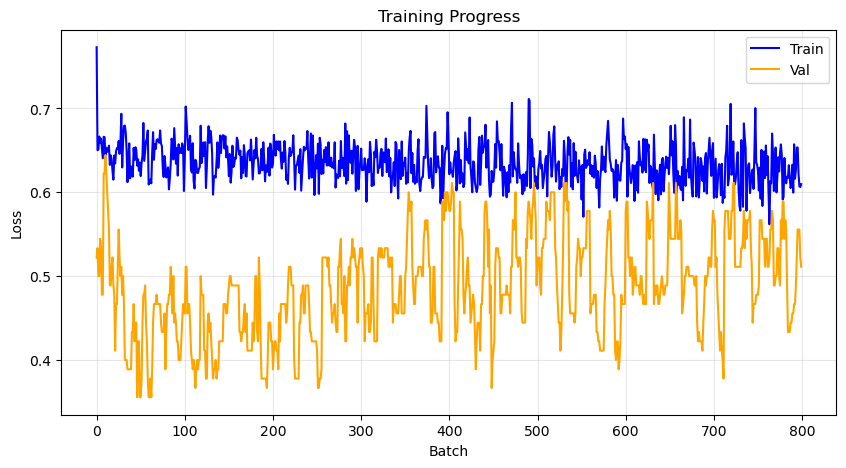

✓ Visualization complete!


In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses_acrossEpochs, label='Train', color='blue')
plt.plot(val_losses_acrossEpochs, label='Val', color='orange')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Progress')
plt.grid(True, alpha=0.3)
plt.show()

print("✓ Visualization complete!")

#### Plot model prediciton for a given unseen patient

In [16]:
print(np.shape(val_set[2][3]))

IndexError: tuple index out of range

### comparison inter intra sampling 

In [9]:
import sys
sys.path.append('/home/andrei/Desktop/PhD/Carepath')

from clean_ndes.main import main
main()

Adherence Prediction: Intra vs Inter-trajectory Sampling Comparison

Generating synthetic data:
  N trajectories: 1000
  T time steps: 183
  D dimensions: 7
  Adherence drops: 90542

--------------------------------------------------------------------------------
INTRA-TRAJECTORY SAMPLING
--------------------------------------------------------------------------------
Intra-trajectory sampling:
  Training set size: 800
  Validation set size: 200
Batch 0: val_loss = 0.6500
Batch 0: train_loss = 0.5133
Batch 1: val_loss = 0.5000
Batch 1: train_loss = 0.4894
Batch 2: val_loss = 0.4500
Batch 2: train_loss = 0.4652
Batch 3: val_loss = 0.4000
Batch 3: train_loss = 0.4744
Batch 4: val_loss = 0.3000
Batch 4: train_loss = 0.4107
Batch 5: val_loss = 0.3000
Batch 5: train_loss = 0.4117
Batch 6: val_loss = 0.2000
Batch 6: train_loss = 0.4133
Batch 7: val_loss = 0.2000
Batch 7: train_loss = 0.3915
Batch 8: val_loss = 0.2000
Batch 8: train_loss = 0.3643
Batch 9: val_loss = 0.1500
Batch 9: train_loss

KeyboardInterrupt: 

In [ ]:
# Setup imports
import sys
sys.path.append('/home/andrei/Desktop/PhD/Carepath')  # parent of clean_ndes

import torch
import numpy as np
import matplotlib.pyplot as plt

from clean_ndes.config import (
    N_TRAJECTORIES, T_TIME_STEPS, D_DIMENSIONS,
    BATCH_SIZE, LEARNING_RATE, SEED
)
from clean_ndes.data_generation import generate_synthetic_data_super_simple
from clean_ndes.datasets import AdherenceDataset
from clean_ndes.model import AdherencePredictor
from clean_ndes.training import train_one_epoch
from torch.utils.data import random_split, DataLoader

# Reproducibility
np.random.seed(SEED)
torch.manual_seed(SEED)


# 1) Generate dataset
N, T, D = N_TRAJECTORIES, T_TIME_STEPS, D_DIMENSIONS
data, adherence_dropped_at = generate_synthetic_data_super_simple(N, T, D)
dataset = AdhereenceDatast(data)

# 2) 80/20 train-val split
dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size
train_set, val_set = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False)

# 3) Create model and train for one epoch (collect per-batch losses)
model = AdherencePredictor(in_dim=D, out_dim=2)  # D includes adherence + controls
train_losses, val_losses = train_one_epoch(
    model, train_loader, val_loader, learning_rate=LEARNING_RATE, verbose=False
)

# 4) Plot convergence curves
plt.figure(figsize=(9, 5))
plt.plot(train_losses, label='Train', color='tab:blue')
plt.plot(val_losses, label='Validation', color='tab:orange')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (one epoch)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5) Plot a sample inference using one trajectory from the validation set
#    - pick a single sample from the underlying dataset via the Subset indices
val_indices = val_set.indices if hasattr(val_set, 'indices') else range(len(val_set))
sample_idx = val_indices[0]

X_val, Y_val = dataset[sample_idx]         # X_val: (T, D-1) controls, Y_val: (T,) adherence
T_sample = Y_val.shape[0]
ts = torch.arange(1, T_sample + 1)

# initial state y0 = [adherence_t0, controls_t0]
y0 = torch.cat([Y_val[0].unsqueeze(0), X_val[0]])

# roll out predicted trajectory
with torch.no_grad():
    traj_pred = model.solve_for_inference(ts=ts, cs=X_val, y0=y0)  # (T, D)
    y_pred = traj_pred[:, 0].long().cpu().numpy()                  # predicted adherence classes
    y_true = Y_val.long().cpu().numpy()



BATCH_SIZE 20


NameError: name 'AdhereenceDatast' is not defined

# Benchmark on real adherence dataset

## Dyads

In [1]:
import pandas as pd
import numpy as np

# Load the steps.csv file
steps_path = "/home/andrei/Desktop/PhD/Carepath/data_for_simulations/Dyads/steps.csv"
df = pd.read_csv(steps_path)

# Filter for Patients group only
df_patients = df[df['Group'] == 'Patients'].copy()

# Convert to numeric
df_patients['DaysFromTransplant'] = pd.to_numeric(df_patients['DaysFromTransplant'], errors='coerce')
df_patients['steps'] = pd.to_numeric(df_patients['steps'], errors='coerce')

# Remove rows with missing values
df_patients = df_patients.dropna(subset=['DaysFromTransplant', 'steps', 'STUDY_PRTCPT_ID'])

# Aggregate steps per day per patient (sum all measurements in a day)
daily_steps = df_patients.groupby(['DaysFromTransplant', 'STUDY_PRTCPT_ID'])['steps'].sum().reset_index()

# Get unique days and patients, sorted
unique_days = sorted(daily_steps['DaysFromTransplant'].unique())
unique_patients = sorted(daily_steps['STUDY_PRTCPT_ID'].unique())

n_days = len(unique_days)
n_patients = len(unique_patients)

print(f"Found {n_days} unique days (range: {min(unique_days)} to {max(unique_days)})")
print(f"Found {n_patients} unique patients")

# Create mapping dictionaries for efficient lookup
day_to_idx = {day: idx for idx, day in enumerate(unique_days)}
patient_to_idx = {patient: idx for idx, patient in enumerate(unique_patients)}

# Initialize array with zeros (missing data will be 0)
arr = np.zeros((n_days, n_patients, 1), dtype=np.float32)

# Fill the array
for _, row in daily_steps.iterrows():
    day_idx = day_to_idx[row['DaysFromTransplant']]
    patient_idx = patient_to_idx[row['STUDY_PRTCPT_ID']]
    arr[day_idx, patient_idx, 0] = row['steps']

print(f"\nArray shape: {arr.shape}")
print(f"Array dtype: {arr.dtype}")
print(f"Total non-zero entries: {(arr != 0).sum()}")
print(f"Min value: {arr[arr > 0].min() if (arr > 0).any() else 0}")
print(f"Max value: {arr.max()}")


Found 121 unique days (range: 0 to 120)
Found 143 unique patients

Array shape: (121, 143, 1)
Array dtype: float32
Total non-zero entries: 10788
Min value: 2.0
Max value: 40658.0


In [2]:
# Verify the array structure
print(f"Shape: {arr.shape} (n_days={arr.shape[0]}, n_patients={arr.shape[1]}, n_features={arr.shape[2]})")
print(f"\nExample: steps for patient {unique_patients[0]} on day {unique_days[0]}: {arr[0, 0, 0]}")
print(f"Example: steps for patient {unique_patients[0]} on day {unique_days[1]}: {arr[1, 0, 0] if len(unique_days) > 1 else 'N/A'}")

# The array is now ready to use: arr[day_index, patient_index, 0] gives the total steps
# for that patient on that day

Shape: (121, 143, 1) (n_days=121, n_patients=143, n_features=1)

Example: steps for patient P001 on day 0: 343.0
Example: steps for patient P001 on day 1: 310.0


In [3]:
# double check agent output

subset = df_patients[
    (df_patients['STUDY_PRTCPT_ID'] == 'P001') &
    (df_patients['Group'] == 'Patients') &
    (df_patients['DaysFromTransplant'] == 0)
]

print(f"Sum of 'steps' in the subset: {subset['steps'].sum()}")

Sum of 'steps' in the subset: 343


In [4]:
# Transform steps array to format expected by clean_ndes: (N, T, D)
# where N=patients, T=days, D=dimensions
# Since we only have steps as target (no control variables), we'll:
# 1. Convert steps to binary classification (high vs low steps)
# 2. Add a dummy control variable (all zeros) since the model requires at least one control

# Transpose from (n_days, n_patients, 1) to (n_patients, n_days, 1)
steps_data = arr.transpose(1, 0, 2)  # (143, 121, 1)

print(f"Transposed shape: {steps_data.shape} (patients, days, features)")

# Extract steps values (remove the last dimension)
steps_values = steps_data[:, :, 0]  # (143, 121)
print(f"Steps statistics: min={steps_values[steps_values > 0].min():.1f}, max={steps_values.max():.1f}, median={np.median(steps_values[steps_values > 0]):.1f}")



# Convert steps to binary classification target
# Use median as threshold: target = 1 if steps >= median, else 0
steps_median = np.median(steps_values[steps_values > 0])  # Median of non-zero steps
steps_target = (steps_values >= steps_median).astype(np.float32)
steps_target[steps_values == 0] = 0  # Zero steps = class 0

print(f"Steps median (threshold): {steps_median:.2f}")
print(f"Steps statistics: min={steps_values[steps_values>0].min():.1f}, max={steps_values.max():.1f}, median={steps_median:.1f}")
print(f"Target class 1: {steps_target.sum()} out of {steps_target.size} total ({steps_target.sum()/steps_target.size*100:.1f}%)")

# Create dummy control variable (all zeros) since model requires at least one control
# The model architecture expects controls, so we provide a dummy one
dummy_control = np.zeros_like(steps_target)

# Combine into final data array: (N, T, D)
# D = 2: target (steps as binary) + 1 dumy contrmol
D = 2
data = np.zeros((steps_data.shape[0], steps_data.shape[1], D), dtype=np.float32)

data[:, :, 0] = steps_target  # Target: steps (binary classification)
data[:, :, 1] = dummy_control  # Dummy control (all zeros)

print(f"\nFinal data shape: {data.shape} (patients, days, dimensions)")
print(f"Dimension 0: Steps target (binary: 0=low steps, 1=high steps)")
print(f"Dimension 1: Dummy control (all zeros - no actual controls)")
print(f"\nData statistics:")
print(f"  Target: min={data[:,:,0].min()}, max={data[:,:,0].max()}, mean={data[:,:,0].mean():.3f}")
print(f"  Control: min={data[:,:,1].min()}, max={data[:,:,1].max()}, mean={data[:,:,1].mean():.3f}")


Transposed shape: (143, 121, 1) (patients, days, features)
Steps statistics: min=2.0, max=40658.0, median=2440.0
Steps median (threshold): 2440.00
Steps statistics: min=2.0, max=40658.0, median=2440.0
Target class 1: 5395.0 out of 17303 total (31.2%)

Final data shape: (143, 121, 2) (patients, days, dimensions)
Dimension 0: Steps target (binary: 0=low steps, 1=high steps)
Dimension 1: Dummy control (all zeros - no actual controls)

Data statistics:
  Target: min=0.0, max=1.0, mean=0.312
  Control: min=0.0, max=0.0, mean=0.000


In [5]:
# Train NDE model on steps data using clean_ndes functionality
import sys
sys.path.append('/home/andrei/Desktop/PhD/Carepath')

import torch
from torch.utils.data import DataLoader, random_split
from clean_ndes.datasets import AdherenceDataset
from clean_ndes.model import AdherencePredictor
from clean_ndes.training import train_one_epoch
from clean_ndes.config import SEED, LEARNING_RATE, BATCH_SIZE

# Set random seeds for reproducibility
np.random.seed(SEED)
torch.manual_seed(SEED)

# Create dataset
# AdherenceDataset expects data shape (N, T, D) where:
# - data[..., 0] is target (steps as binary classification)
# - data[..., 1:] are control variables (dummy in our case)
dataset = AdherenceDataset(data)

# TODO: input batch size

print("BATCH_SIZE", BATCH_SIZE)

print(f"Dataset size: {len(dataset)} patients")
print(f"Sample shape - X (controls): {dataset[0][0].shape}, Y (target): {dataset[0][1].shape}")

# Split into train and validation (80/20)
dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size
train_set, val_set = random_split(dataset, [train_size, val_size], 
                                   generator=torch.Generator().manual_seed(SEED))

print(f"Train set: {train_size} patients")
print(f"Validation set: {val_size} patients")

# Create data loaders
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False)

# Create model
# INPUT_DIM = D (total dimensions: target + controls)
# OUTPUT_DIM = 2 (binary classification: low steps=0, high steps=1)
INPUT_DIM = data.shape[2]  # D = 2 (target + 1 dummy control)
OUTPUT_DIM = 2  # Binary classification

model = AdherencePredictor(in_dim=INPUT_DIM, out_dim=OUTPUT_DIM, hidden_dim=64)

print(f"\nModel created:")
print(f"  Input dim: {INPUT_DIM} (target + dummy control)")
print(f"  Output dim: {OUTPUT_DIM} (binary: low steps=0, high steps=1)")
print(f"  Parameters: {sum(p.numel() for p in model.parameters())}")


BATCH_SIZE 20
Dataset size: 143 patients
Sample shape - X (controls): torch.Size([121, 1]), Y (target): torch.Size([121])
Train set: 114 patients
Validation set: 29 patients

Model created:
  Input dim: 2 (target + dummy control)
  Output dim: 2 (binary: low steps=0, high steps=1)
  Parameters: 8642


In [6]:
# Train the model for multiple epochs (10 epochs)
print("=" * 80)
print("Training NDE model on steps data (target only, no controls)")
print("=" * 80)

EPOCHS = 10
all_train_losses = []
all_val_losses = []

for epoch in range(1, EPOCHS + 1):
    train_losses, val_losses = train_one_epoch(
        model, 
        train_loader, 
        val_loader, 
        learning_rate=LEARNING_RATE,
        verbose=True
    )
    all_train_losses.extend(train_losses)
    all_val_losses.extend(val_losses)
    print(f"Epoch {epoch}/{EPOCHS} complete.")
    print(f"  Last train loss: {train_losses[-1]:.4f}")
    print(f"  Last val loss: {val_losses[-1]:.4f}")

print(f"\nTraining complete after {EPOCHS} epochs!")
print(f"  Final train loss: {all_train_losses[-1]:.4f}")
print(f"  Final val loss: {all_val_losses[-1]:.4f}")
print(f"  Total batches: {len(all_train_losses)}")

# For later code compatibility with single-epoch version:
train_losses = all_train_losses
val_losses = all_val_losses


Training NDE model on steps data (target only, no controls)
Batch 0: val_loss = 0.4194
Batch 0: train_loss = 0.6842
Batch 1: val_loss = 0.4194
Batch 1: train_loss = 0.6898
Batch 2: val_loss = 0.4194
Batch 2: train_loss = 0.6651
Batch 3: val_loss = 0.4194
Batch 3: train_loss = 0.6559
Batch 4: val_loss = 0.4194
Batch 4: train_loss = 0.6716
Batch 5: val_loss = 0.4194
Batch 5: train_loss = 0.6545
Epoch 1/10 complete.
  Last train loss: 0.6545
  Last val loss: 0.4194
Batch 0: val_loss = 0.3246
Batch 0: train_loss = 0.6439
Batch 1: val_loss = 0.3246
Batch 1: train_loss = 0.6529
Batch 2: val_loss = 0.3246
Batch 2: train_loss = 0.6140
Batch 3: val_loss = 0.3246
Batch 3: train_loss = 0.6060
Batch 4: val_loss = 0.3246
Batch 4: train_loss = 0.6088
Batch 5: val_loss = 0.3246
Batch 5: train_loss = 0.6278
Epoch 2/10 complete.
  Last train loss: 0.6278
  Last val loss: 0.3246
Batch 0: val_loss = 0.4194
Batch 0: train_loss = 0.6726
Batch 1: val_loss = 0.4194
Batch 1: train_loss = 0.6396
Batch 2: val_l

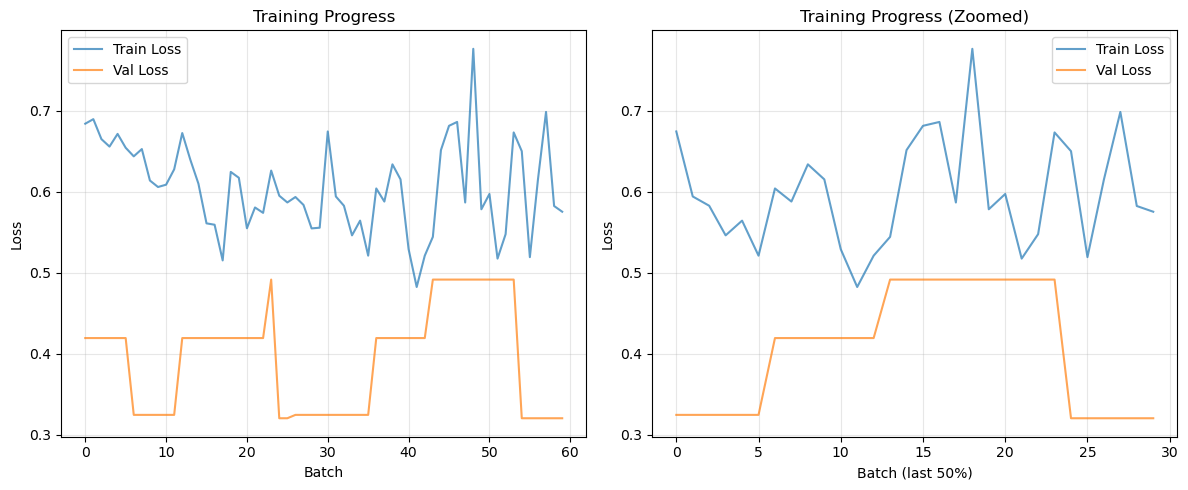

✓ Visualization complete!


In [7]:
# Plot training curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', color='tab:blue', alpha=0.7)
plt.plot(val_losses, label='Val Loss', color='tab:orange', alpha=0.7)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training Progress')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Plot last 50% of batches to see convergence better
start_idx = len(train_losses) // 2
plt.plot(train_losses[start_idx:], label='Train Loss', color='tab:blue', alpha=0.7)
plt.plot(val_losses[start_idx:], label='Val Loss', color='tab:orange', alpha=0.7)
plt.xlabel('Batch (last 50%)')
plt.ylabel('Loss')
plt.title('Training Progress (Zoomed)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualization complete!")


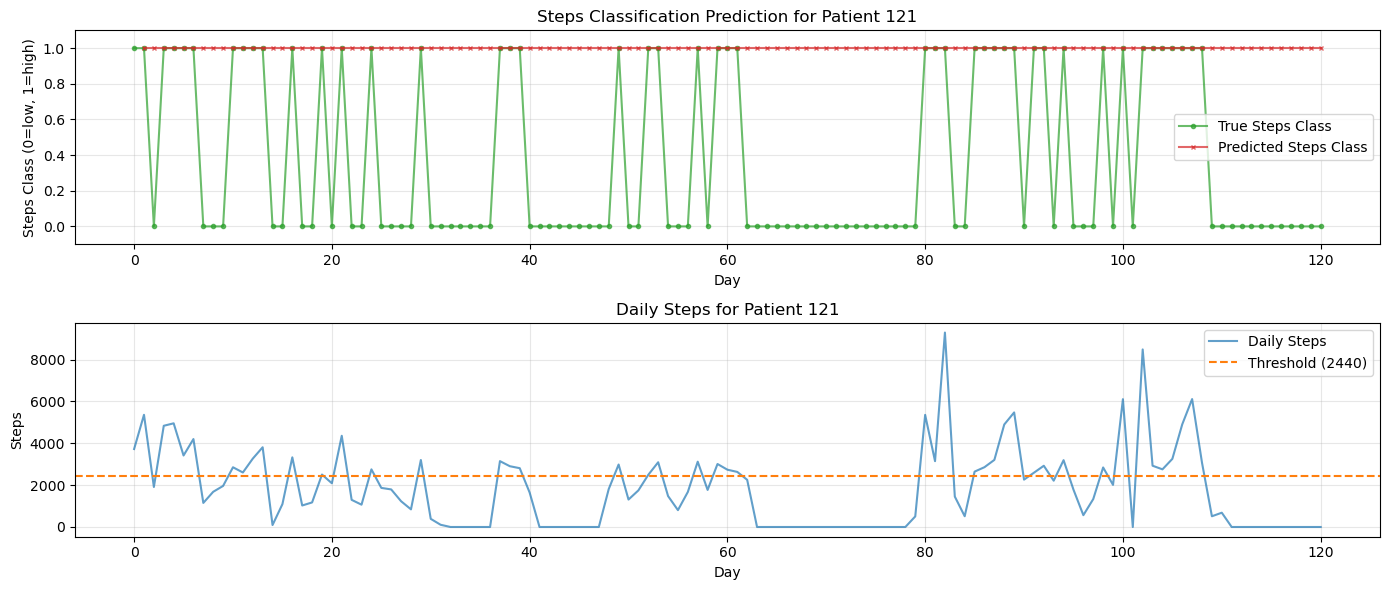

Prediction accuracy for patient 121: 0.367
Compared 120 time steps (from day 1 to day 120)
True steps class 1 rate: 0.367
Predicted steps class 1 rate: 1.000
Steps threshold: 2440.0


In [19]:
# Test inference on a sample patient from validation set
model.eval()

# Get a sample from validation set
val_indices = val_set.indices if hasattr(val_set, 'indices') else list(range(len(val_set)))
sample_idx = val_indices[6]

X_val, Y_val = dataset[sample_idx]  # X_val: (T, D-1) dummy controls, Y_val: (T,) steps target
T_sample = Y_val.shape[0]
ts = torch.arange(1, T_sample + 1)

# Initial state y0 = [target_t0, controls_t0]
y0 = torch.cat([Y_val[0].unsqueeze(0), X_val[0]])

# Roll out predicted trajectory
with torch.no_grad():
    traj_pred = model.solve_for_inference(ts=ts, cs=X_val, y0=y0)  # Returns trajectory
    y_pred = traj_pred[:, 0].long().cpu().numpy()  # predicted steps classes
    y_true = Y_val.long().cpu().numpy()

# The trajectory includes initial state at index 0, so we skip it for comparison
# Compare predictions from time 1 onwards with true values from time 1 onwards
# This ensures both arrays have the same length
y_pred_compare = y_pred[1:]  # Skip initial state
y_true_compare = y_true[1:]  # Skip initial state to match predictions

# Ensure same length (in case of any remaining mismatch)
min_len = min(len(y_pred_compare), len(y_true_compare))
y_pred_compare = y_pred_compare[:min_len]
y_true_compare = y_true_compare[:min_len]

# Plot prediction vs actual
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
# Plot all true values
plt.plot(y_true, label='True Steps Class', marker='o', alpha=0.7, color='tab:green', markersize=3)
# Plot predictions (starting from time 1, so shift x-axis)
pred_x = np.arange(1, len(y_pred_compare) + 1)
plt.plot(pred_x, y_pred_compare, label='Predicted Steps Class', marker='x', alpha=0.7, color='tab:red', markersize=3)
plt.xlabel('Day')
plt.ylabel('Steps Class (0=low, 1=high)')
plt.title(f'Steps Classification Prediction for Patient {sample_idx}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)

# Plot actual steps data for this patient
plt.subplot(2, 1, 2)
patient_steps = steps_values[sample_idx, :]
plt.plot(patient_steps, label='Daily Steps', color='tab:blue', alpha=0.7)
plt.axhline(y=steps_median, color='tab:orange', linestyle='--', label=f'Threshold ({steps_median:.0f})')
plt.xlabel('Day')
plt.ylabel('Steps')
plt.title(f'Daily Steps for Patient {sample_idx}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate accuracy on aligned predictions
if len(y_pred_compare) > 0 and len(y_true_compare) > 0:
    accuracy = (y_pred_compare == y_true_compare).mean()
    print(f"Prediction accuracy for patient {sample_idx}: {accuracy:.3f}")
    print(f"Compared {len(y_pred_compare)} time steps (from day 1 to day {len(y_pred_compare)})")
    print(f"True steps class 1 rate: {y_true_compare.mean():.3f}")
    print(f"Predicted steps class 1 rate: {y_pred_compare.mean():.3f}")
    print(f"Steps threshold: {steps_median:.1f}")
else:
    print(f"Warning: Could not align predictions and true values for comparison")
    print(f"y_pred shape: {y_pred.shape}, y_true shape: {y_true.shape}")
    print(f"y_pred_compare shape: {y_pred_compare.shape}, y_true_compare shape: {y_true_compare.shape}")


### Reinforce - refer to `train_reinforce.py`

In [27]:
import numpy as np

# Load the np array from the given file path into a variable
reinforce_data = np.load('/home/andrei/Desktop/PhD/Carepath/tensor_Reinforce.npy', allow_pickle=True)

print(reinforce_data.shape)

# Calculate stats for reinforce_data[:, :, 0]
reinforce_data_0 = reinforce_data[:, :, 0]

# Calculate the percentage frequency of each unique value
unique_vals, counts = np.unique(reinforce_data_0, return_counts=True)
total = reinforce_data_0.size
percentages = counts / total * 100

print("Percentage frequency of each unique value in reinforce_data[:, :, 0]:")
for val, pct, cnt in zip(unique_vals, percentages, counts):
    print(f"Value {val}: {pct:.2f}% ({cnt} occurrences)")



(28, 183, 7)
Percentage frequency of each unique value in reinforce_data[:, :, 0]:
Value 0.0: 87.33% (4475 occurrences)
Value 0.16667: 0.02% (1 occurrences)
Value 0.25: 0.55% (28 occurrences)
Value 0.5: 7.38% (378 occurrences)
Value 0.75: 2.50% (128 occurrences)
Value 0.83333: 0.02% (1 occurrences)
Value 1.0: 2.21% (113 occurrences)


In [5]:
import os

# Optionally choose/print working directory before loading datasets
cwd = os.getcwd()
print(f"Current working directory: {cwd}")
os.chdir('/home/andrei/Desktop/PhD/Carepath')


from clean_ndes import create_reinforce_dataset, get_reinforce_config, AdherencePredictor, train_one_epoch
import numpy as np

# Load dataset
dataset = create_reinforce_dataset("/home/andrei/Desktop/PhD/Carepath/tensor_Reinforce.npy")

# Get configuration
data_raw = np.load("/home/andrei/Desktop/PhD/Carepath/tensor_Reinforce.npy")
config = get_reinforce_config(data_raw)

# Create model with 5 classes
model = AdherencePredictor(in_dim=config['input_dim'], out_dim=config['output_dim'])

# Train as usual
train_losses, val_losses = train_one_epoch(model, train_loader, val_loader)

Current working directory: /home/andrei/Desktop/PhD/Carepath


NameError: name 'train_loader' is not defined